In [ ]:
import regex as re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functools import reduce
import difflib
import random
random.seed(10) # Don't change this!

In [ ]:
with open("pattern.txt", "r") as f:
    pat = re.compile(f.read())


text_file = "tweeteval/datasets/stance/abortion/train_text.txt"

with open(text_file, "r") as f:
    text = f.read()

corpus = re.findall(pat, text)

In [ ]:
def tokenize(pat, text):
    return re.findall(pat, text)


def statistics(corpus):
    counts = Counter(corpus)
    corpus_size = len(corpus)
    vocab_size = len(counts)
    return (counts, corpus_size, vocab_size, vocab_size/corpus_size)

In [ ]:
def zipf(corpus):
    voc = Counter(corpus)
    frq = pd.DataFrame(voc.most_common(), columns=['token', 'frequency'])

    # Index in the sorted list
    frq['idx'] = frq.index + 1

    # Frequency normalised by corpus size
    frq['norm_freq'] = frq.frequency / len(corpus)

    # Cumulative normalised frequency
    frq['cumul_frq'] = frq.norm_freq.cumsum()

    sns.set_theme(style='whitegrid')

    # Plot: Cumulative frequency by index
    sns.relplot(x='idx', y='cumul_frq', data=frq)
    plt.show()

    # Plot: Cumulative frequency by index, top 10000 tokens
    sns.relplot(x='idx', y='cumul_frq', data=frq[:10000], kind='line')
    plt.show()

    # Plot: Log-log plot for Zipf's law
    frq['log_frq'] = np.log(frq.frequency)
    frq['log_rank'] = np.log(frq.frequency.rank(ascending=False))
    sns.relplot(x='log_rank', y='log_frq', data=frq)
    plt.show()

In [ ]:
# 2 Characterising your data

#• Corpus size, vocabulary size, type/token ratio.

irony_list = []
with open("tweeteval/datasets/irony/test_text.txt", "r") as f:
    irony_text = f.read()

irony_corpus = tokenize(pat, irony_text)
statistics(irony_corpus)
def datfr(corpus):
    voc = Counter(corpus)
    frq = pd.DataFrame(voc.most_common(), columns=['token', 'frequency'])

    # Index in the sorted list
    frq['idx'] = frq.index + 1

    # Frequency normalised by corpus size
    frq['norm_freq'] = frq.frequency / len(corpus)

    # Cumulative normalised frequency
    frq['cumul_frq'] = frq.norm_freq.cumsum()
    sns.set_theme(style='whitegrid')
    return(frq)
datfr(irony_corpus)

,token,frequency,idx,norm_freq,cumul_frq
0,@user,465,1,0.041067,0.041067
1,the,301,2,0.026583,0.067650
2,to,244,3,0.021549,0.089199
3,a,217,4,0.019165,0.108364
4,I,180,5,0.015897,0.124260
...,...,...,...,...,...
4172,📚,1,4173,0.000088,0.999647
4173,📖,1,4174,0.000088,0.999735
4174,#Stop,1,4175,0.000088,0.999823
4175,Labeling,1,4176,0.000088,0.999912


Abortion
Corpus size: 4703	Dictionary size: 1723	Type/token ratio: 0.366
    token  frequency  idx  norm_freq  cumul_frq
0  #SemST        280    1   0.059536   0.059536
1   @user        174    2   0.036998   0.096534
2     the        120    3   0.025516   0.122050
3      to         86    4   0.018286   0.140336
4      of         72    5   0.015309   0.155645
5       a         70    6   0.014884   0.170529
6      is         63    7   0.013396   0.183925
7       I         60    8   0.012758   0.196683
8      in         57    9   0.012120   0.208803
9     you         46   10   0.009781   0.218584



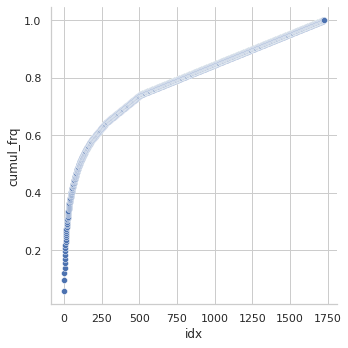

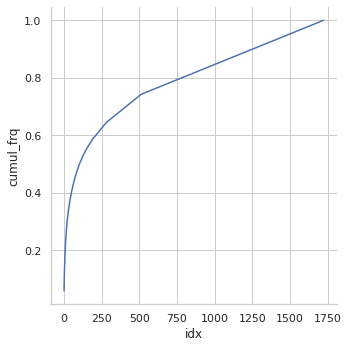

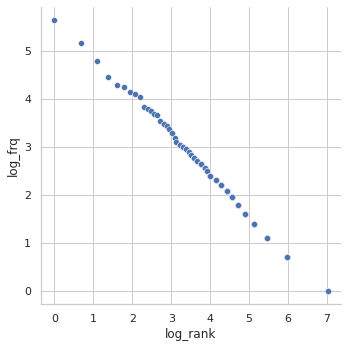

Atheism
Corpus size: 3788	Dictionary size: 1573	Type/token ratio: 0.415
    token  frequency  idx  norm_freq  cumul_frq
0  #SemST        220    1   0.058078   0.058078
1     the        105    2   0.027719   0.085797
2      to         91    3   0.024023   0.109820
3     and         84    4   0.022175   0.131996
4      is         68    5   0.017951   0.149947
5   @user         59    6   0.015576   0.165523
6      of         58    7   0.015312   0.180834
7       a         57    8   0.015048   0.195882
8       I         50    9   0.013200   0.209081
9      in         48   10   0.012672   0.221753



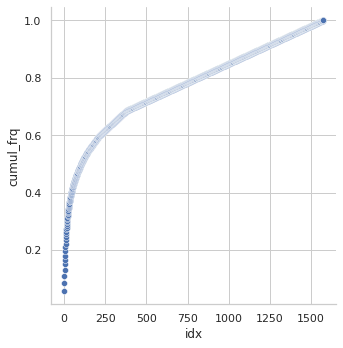

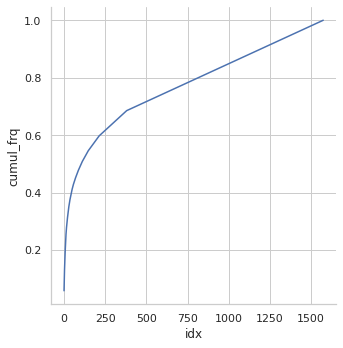

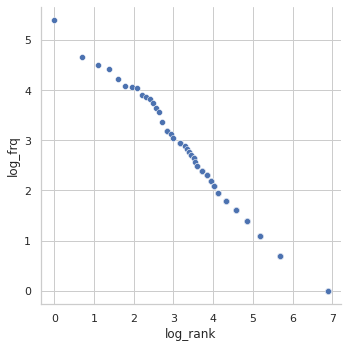

Climate
Corpus size: 2746	Dictionary size: 1286	Type/token ratio: 0.468
    token  frequency  idx  norm_freq  cumul_frq
0  #SemST        169    1   0.061544   0.061544
1   @user        102    2   0.037145   0.098689
2     the         86    3   0.031318   0.130007
3      to         80    4   0.029133   0.159141
4      is         43    5   0.015659   0.174800
5      in         43    6   0.015659   0.190459
6      of         42    7   0.015295   0.205754
7       a         34    8   0.012382   0.218135
8     and         26    9   0.009468   0.227604
9      on         25   10   0.009104   0.236708



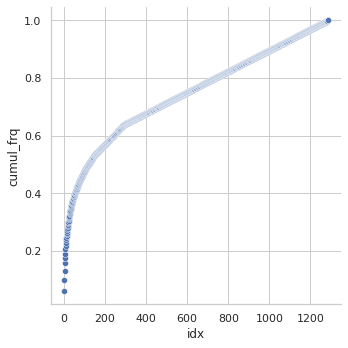

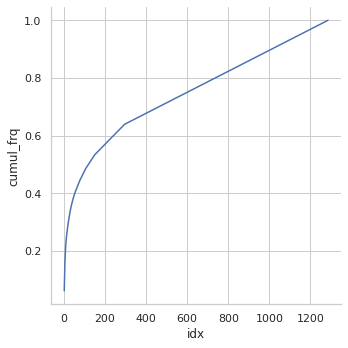

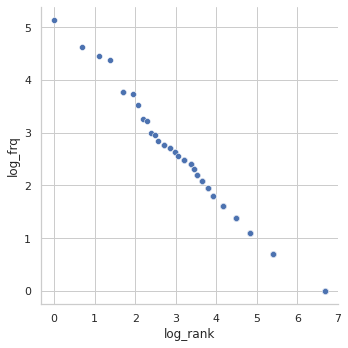

Feminist
Corpus size: 4902	Dictionary size: 1825	Type/token ratio: 0.372
    token  frequency  idx  norm_freq  cumul_frq
0  #SemST        285    1   0.058140   0.058140
1       a        124    2   0.025296   0.083435
2      to        115    3   0.023460   0.106895
3   @user        115    4   0.023460   0.130355
4     the        112    5   0.022848   0.153203
5       I         75    6   0.015300   0.168503
6      is         69    7   0.014076   0.182579
7      of         66    8   0.013464   0.196042
8     and         64    9   0.013056   0.209098
9      in         53   10   0.010812   0.219910



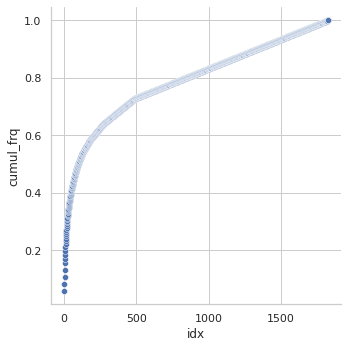

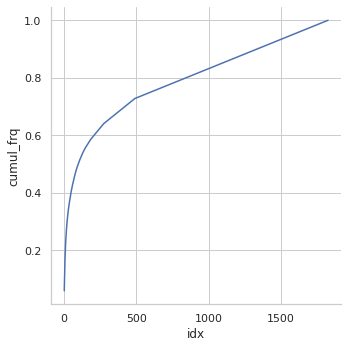

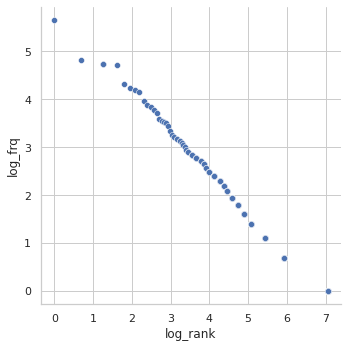

Hillary
Corpus size: 4783	Dictionary size: 1787	Type/token ratio: 0.374
    token  frequency  idx  norm_freq  cumul_frq
0  #SemST        295    1   0.061677   0.061677
1   @user        264    2   0.055195   0.116872
2     the        135    3   0.028225   0.145097
3      to        106    4   0.022162   0.167259
4       a         77    5   0.016099   0.183358
5      of         65    6   0.013590   0.196948
6      is         64    7   0.013381   0.210328
7       I         56    8   0.011708   0.222036
8     and         54    9   0.011290   0.233326
9     for         45   10   0.009408   0.242735



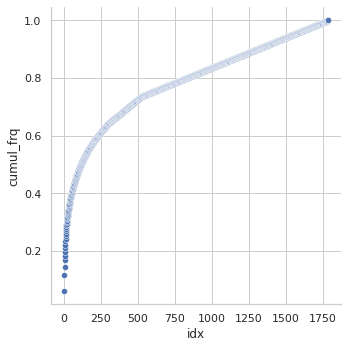

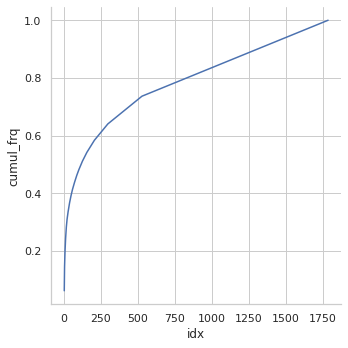

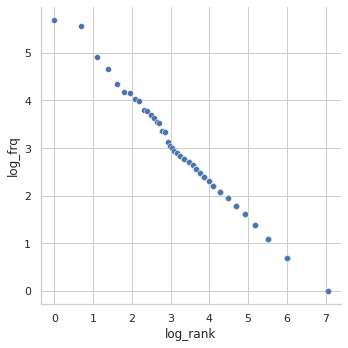

In [ ]:
stances = ["abortion", "atheism", "climate", "feminist", "hillary"]
stance_texts = []
for stance in stances:
    with open(f"tweeteval/datasets/stance/{stance}/test_text.txt") as f:
        stance_texts.append(f.read())
for text, stance in zip(stance_texts, stances):
    print(stance.title())
    corpus = tokenize(pat, text)
    stats = statistics(corpus)
    print(f"Corpus size: {stats[1]}\tDictionary size: {stats[2]}\tType/token ratio: {stats[3]:.3}")
    print(datfr(corpus).head(10))
    print()
    zipf(corpus)

In [ ]:
# 3 Manual Annotation and Inter-Annotator Agreement

In [ ]:
random.seed(10)

lines = []

with open("tweeteval/datasets/irony/train_text.txt") as f:
    for line in f:
        lines.append(line.strip())

random_lines_index = random.sample([i for i in range(0, len(lines))], k = 100)


with open("manual_annotation.txt", "w") as f:
    for i in range(100):
        f.write(f"{random_lines_index[i]}@@@ {lines[random_lines_index[i]]}")
        f.write("\n")

'seeing ppl walking w/ crutches makes me really excited for the next 3 weeks of my life'

$$
    \underbrace{\stackrel{1}{\text{in}}\quad\stackrel{2}{\text{the}}}_{\stackrel{\text{bigram}}{\text{2-gram}}}
    \qquad p(\text{the} \;|\; \underbrace{\phantom{text}\text{in}\phantom{text}}_{\text{firstorder MM}})
$$

In [1]:
from nltk.metrics.agreement import AnnotationTask

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e4cdc3a5-dd4a-4d72-a71a-972cea883107' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>